<a href="https://colab.research.google.com/github/proffranciscofernando/introduction-to-deep-learning/blob/main/DL-basics-of-neural-networks-MNIST-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Definition

The objective is to classify grayscale images of handwritten digits (0-9) from the MNIST dataset. This is a collection of 70,000 grayscale images of handwritten digits (0-9). Each image is a 28x28 pixel matrix, where each pixel represents the intensity of grayscale values (0 to 255).

The MNIST dataset consists of 60,000 training samples and 10,000 test samples. It is widely used as a benchmark in machine learning for tasks like image classification.

The goal is to train a neural network to accurately predict the correct digit for each image based on patterns learned during training. This is a supervised learning problem where the input is the image, and the output is the digit label.

Here is an example of how the computer interpret each image from the dataset:

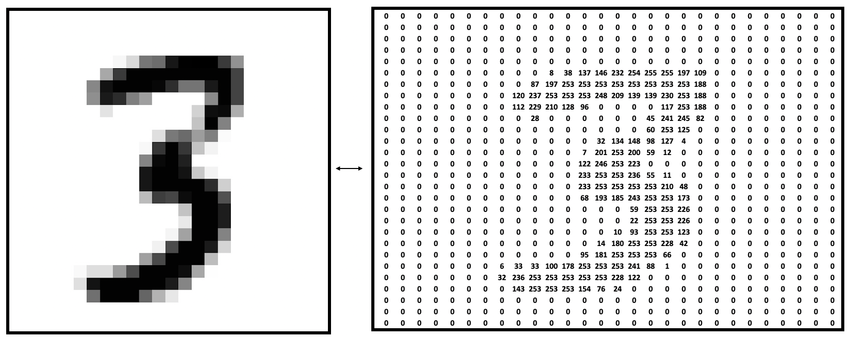

# 2. Setup

## 2.1. Libraries

In [ ]:
# Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

TensorFlow is a popular deep learning framework used to build and train neural networks and will be used here due to its flexibility, scalability, and ease of integration. For beginners, TensorFlow offers high-level APIs like Keras, which simplify the process of creating and training models. These features make TensorFlow an excellent choice for learning and experimentation.

# 2.2. Exploratory analysis

Before loading the dataset, let's understand its structure visually. This will help us comprehend the nature of the data we are working with.


In [ ]:
# Temporary loading of MNIST for visualization
(temp_X_train, temp_y_train), _ = mnist.load_data()

# Plot a grid of sample images with labels
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(temp_X_train[i], cmap='gray')
    plt.title(f"Label: {temp_y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

This will help us check if the dataset is balanced (i.e., equal representation of all digits).


In [ ]:
# Analyze class distribution
unique, counts = np.unique(temp_y_train, return_counts=True)
plt.bar(unique, counts, color='blue', alpha=0.7)
for i, count in enumerate(counts):
    plt.text(unique[i], count, str(count), ha='center', va='bottom')
plt.title('Class Distribution in MNIST Training Set')
plt.xticks(unique, [str(digit) for digit in unique])
plt.xlabel('Digit Labels')
plt.ylabel('Frequency')
plt.show()

# 3. Load and preprocess the MNIST dataset

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Visualize the effects of normalization
# Compare the pixel intensity distribution before and after normalization
plt.figure(figsize=(12, 5))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(temp_X_train.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Pixel Intensity Before Normalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# After normalization
plt.subplot(1, 2, 2)
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity After Normalization')
plt.xlabel('Pixel Intensity (Normalized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Normalization ensures that the input data has a uniform range, which helps the model converge faster during training. Neural networks perform better when the data is scaled, as it prevents larger input values from dominating the learning process.

# 4. Modelling

The model is built using TensorFlow's Sequential API, which allows us to stack layers sequentially. Each layer processes data in a specific way:
1. Flatten Layer: Converts the 2D input images (28x28 pixels) into a 1D array of 784 features. This is necessary to feed the data into the Dense layers.
2. Dense Layer (Hidden): A fully connected layer and ReLU activation. ReLU introduces non-linearity, allowing the model to learn complex patterns.
3. Dense Layer (Output): The final layer has 10 neurons, each representing a digit (0-9). It uses the softmax activation function to produce probabilities for each class, enabling classification.

In [ ]:
# Build neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 2D image into a 1D array
    Dense(8, activation='relu'),  # First hidden layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Save the trained model immediately after training
model.save('mnist_model.h5')
print("Model saved successfully after training.")

In [ ]:
# Evaluate the model on the test data

# Load the saved model
# This will load the model from the HDF5 file for evaluation or inference.
loaded_model = tf.keras.models.load_model('mnist_model.h5')
print("Model loaded successfully from HDF5 file.")

# Evaluate the loaded model on the test data
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f"Test accuracy (from loaded model): {test_acc:.2f}")

In [ ]:
# Visualize training performance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Visualize some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = y_test[i]
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis("off")
plt.show()

# 5. Experimentation

Run experiments with the model architecture and training process. Here are some suggestions:
* Add more hidden layers: Try increasing the depth of the network by stacking additional Dense layers.
* Change the number of neurons: Modify the number of neurons in each * Dense layer to see how it affects performance.
* Use different activation functions: Experiment with alternatives like 'sigmoid', 'tanh', or 'LeakyReLU'.
* Try other optimization algorithms: Replace 'adam' with optimizers like 'sgd', 'rmsprop', or 'nadam'.
* Alter the number of epochs: Train the model for more or fewer epochs and observe overfitting or underfitting.
* Use dropout: Introduce dropout layers to prevent overfitting and enhance generalization.
* Modify the learning rate: Adjust the optimizer's learning rate to see how it influences convergence.

Document your changes and verify if or how each modification impacts the training, validation, and test accuracy.

# 6. Conclusion

Write your conclusions here